In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import joblib

**1: Load Dataset**

In [24]:
print("Loading Iris Dataset...")

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

print("Dataset Loaded Successfully")
print(df.head())

Loading Iris Dataset...
Dataset Loaded Successfully
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


**2: Data Visualization**

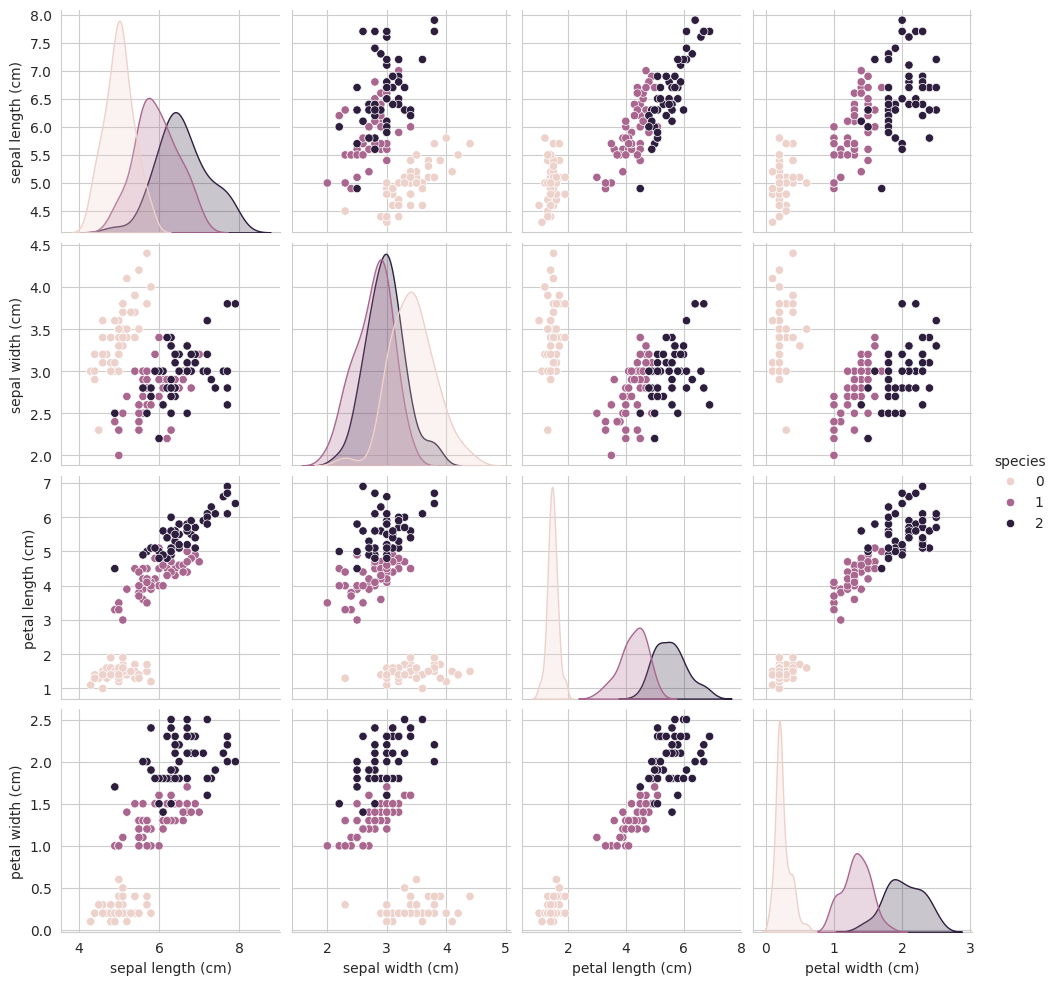

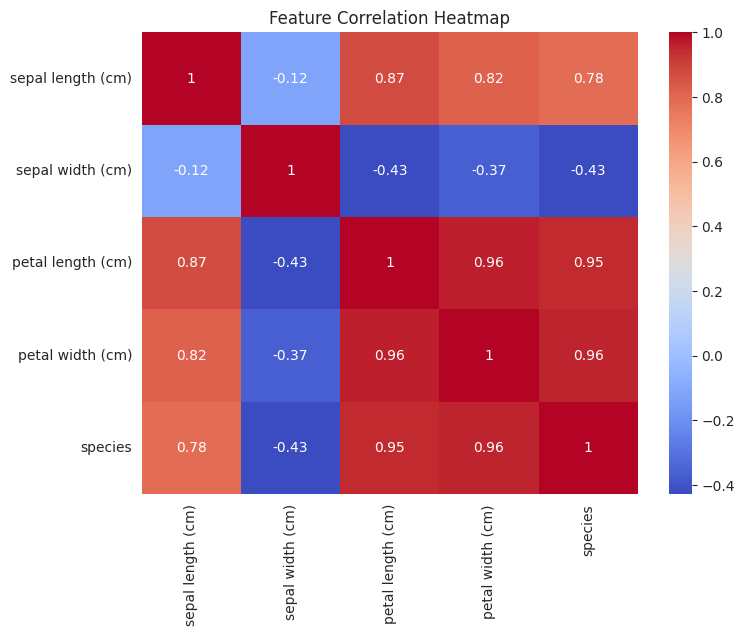

In [25]:
sns.set_style("whitegrid")

# Pairplot
sns.pairplot(df, hue="species")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**3: Feature Selection**

In [26]:
X = df.drop("species", axis=1)
y = df["species"]

**4: Train Test Split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

print("Data Split Completed")

Data Split Completed


**5: Model Training**

In [30]:
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

print("Model Training Completed")

Model Training Completed


**6: Model Evaluation**

In [31]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())

print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross Validation Accuracy: 0.9733333333333334

Model Accuracy: 0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**7: Save Model**

In [32]:
joblib.dump(model, "iris_model.pkl")

print("\nModel saved as iris_model.pkl")


Model saved as iris_model.pkl
